In [1]:
# Linear Mixed Effects Models

In [2]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext rpy2.ipython

In [5]:
# %R install.packages('lme4')

In [6]:
%R library(lme4)

array(['lme4', 'Matrix', 'tools', 'RevoUtils', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'RevoUtilsMath', 'methods',
       'base'], dtype='<U13')

### Comparing R lmer to Statsmodels MixedLM
The Statsmodels imputation of linear mixed models (MixedLM) closely follows the approach outlined in Lindstrom and Bates (JASA 1988). This is also the approach followed in the R package LME4. Other packages such as Stata, SAS, etc. should also be consistent with this approach, as the basic techniques in this area are mostly mature.

Here we show how linear mixed models can be fit using the MixedLM procedure in Statsmodels. Results from R (LME4) are included for comparison.

### Growth curves of pigs
These are longitudinal data from a factorial experiment. The outcome variable is the weight of each pig, and the only predictor variable we will use here is "time". First we fit a model that expresses the mean weight as a linear function of time, with a random intercept for each pig. The model is specified using formulas. Since the random effects structure is not specified, the default random effects structure (a random intercept for each group) is automatically used.

In [7]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data

In [8]:
data.head()

,Weight,Feed,Time,Pig,Evit,Cu,Litter
0,26.50000,NaN,1,4601,1,1,1
1,27.59999,5.200005,2,4601,1,1,1
2,36.50000,17.600000,3,4601,1,1,1
3,40.29999,28.500000,4,4601,1,1,1
4,49.09998,45.200001,5,4601,1,1,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 7 columns):
Weight    861 non-null float64
Feed      789 non-null float64
Time      861 non-null int64
Pig       861 non-null int64
Evit      861 non-null int64
Cu        861 non-null int64
Litter    861 non-null int64
dtypes: float64(2), int64(5)
memory usage: 47.2 KB


In [ ]:
# build and fit the model

In [9]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Likelihood:         -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            



In [10]:
# run the 'same' model in R

In [12]:
%R install.packages('geepack')

In [17]:
%R install.packages('lme4')

In [13]:
%%R
data(dietox, package = 'geepack')

In [23]:
%R  library(lme4)

array(['lme4', 'Matrix', 'tools', 'RevoUtils', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'RevoUtilsMath', 'methods',
       'base'], dtype='<U13')

In [36]:
%R head(dietox)

,Weight,Feed,Time,Pig,Evit,Cu,Litter
0,26.50000,NaN,1,4601,1,1,1
1,27.59999,5.200005,2,4601,1,1,1
2,36.50000,17.600000,3,4601,1,1,1
3,40.29999,28.500000,4,4601,1,1,1
4,49.09998,45.200001,5,4601,1,1,1
5,55.39999,56.900002,6,4601,1,1,1


In [31]:
# %R print(summary(lm(Weight ~ Time,  data=dietox)))

There has been a lot of debate about whether the standard errors for random effect variance and covariance parameters are useful. In LME4, these standard errors are not displayed, because the authors of the package believe they are not very informative. While there is good reason to question their utility, we elected to include the standard errors in the summary table, but do not show the corresponding Wald confidence intervals.

Next we fit a model with two random effects for each animal: a random intercept, and a random slope (with respect to time). This means that each pig may have a different baseline weight, as well as growing at a different rate. The formula specifies that "Time" is a covariate with a random coefficient. By default, formulas always include an intercept (which could be suppressed here using "0 + Time" as the formula).

In [35]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               5.7891    
Min. group size:   11       Likelihood:          -2220.3890
Max. group size:   12       Converged:           No        
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.672 23.438 0.000 14.423 17.055
Time              6.939    0.085 81.326 0.000  6.772  7.106
Group Var        30.266    4.271                           
Group x Time Cov  0.746    0.304                           
Time Var          0.483    0.046                           



The likelihood drops by 0.3 when we fix the correlation parameter to 0. Comparing 2 x 0.3 = 0.6 to the chi^2 1 df reference distribution suggests that the data are very consistent with a model in which this parameter is equal to 0.

In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html

In [37]:
# Sitka growth data. The outcome variable is the size of the tree, and the covariate used here is a time value. 
# The data are grouped by tree.

In [38]:
data = sm.datasets.get_rdataset("Sitka", "MASS").data
endog = data["size"]
data["Intercept"] = 1
exog = data[["Intercept", "Time"]]

In [ ]:
# Here is the statsmodels LME fit for a basic model with a random intercept. We are passing the endog and exog data 
# directly to the LME init function as arrays. Also note that endog_re is specified explicitly in argument 4 as a random 
# intercept (although this would also be the default if it were not specified).

In [39]:
md = sm.MixedLM(endog, exog, groups=data["tree"], exog_re=exog["Intercept"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: size    
No. Observations:  395     Method:             REML    
No. Groups:        79      Scale:              0.0392  
Min. group size:   5       Likelihood:         -82.3884
Max. group size:   5       Converged:          Yes     
Mean group size:   5.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.273    0.088 25.864 0.000  2.101  2.446
Time          0.013    0.000 47.796 0.000  0.012  0.013
Intercept Var 0.374    0.345                           



If we run this in statsmodels LME with defaults, we see that the variance estimate is indeed very small, which leads to a warning about the solution being on the boundary of the parameter space. The regression slopes agree very well with R, but the likelihood value is much higher than that returned by R.

In [40]:
exog_re = exog.copy()
md = sm.MixedLM(endog, exog, data["tree"], exog_re)
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    size    
No. Observations:    395        Method:                REML    
No. Groups:          79         Scale:                 0.0264  
Min. group size:     5          Likelihood:            -62.4834
Max. group size:     5          Converged:             Yes     
Mean group size:     5.0                                       
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             2.273    0.101 22.513 0.000  2.075  2.471
Time                  0.013    0.000 33.888 0.000  0.012  0.013
Intercept Var         0.646    0.914                           
Intercept x Time Cov -0.001    0.003                           
Time Var              0.000    0.000                           



In [43]:
import matplotlib.pyplot as plt

In [45]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    likev = mdf.profile_re(0, 're', dist_low=0.1, dist_high=0.1)

Text(0,0.5,'-2 times profile log likelihood')

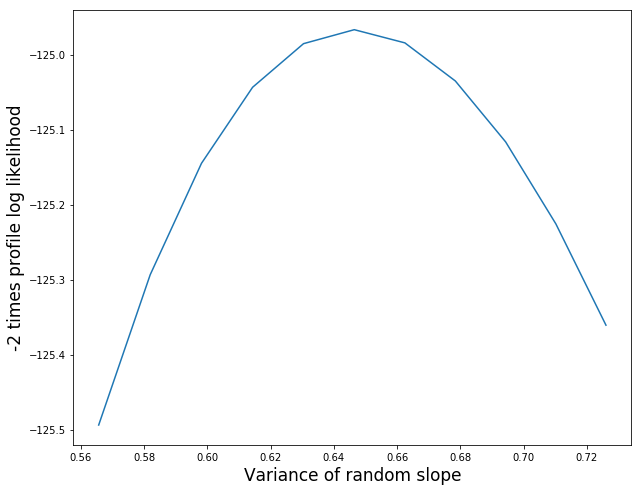

In [46]:
plt.figure(figsize=(10,8))
plt.plot(likev[:,0], 2*likev[:,1])
plt.xlabel("Variance of random slope", size=17)
plt.ylabel("-2 times profile log likelihood", size=17)

Here is a plot of the profile likelihood function. The profile likelihood plot shows that the MLE of the random slope variance parameter is a very small positive number, and that there is low uncertainty in this estimate.

Text(0,0.5,'-2 times profile log likelihood')

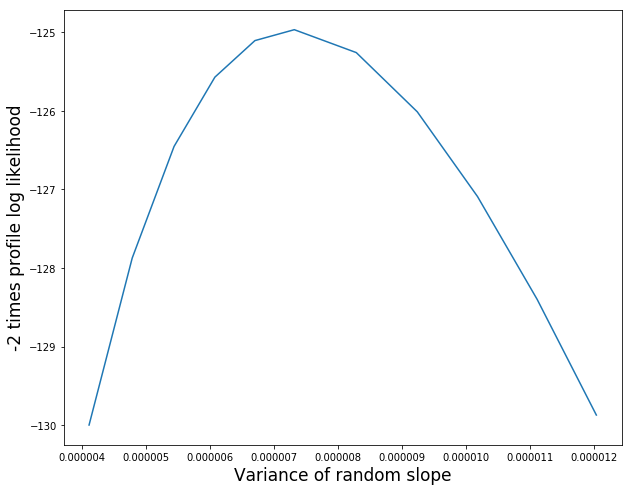

In [47]:
re = mdf.cov_re.iloc[1, 1]
likev = mdf.profile_re(1, 're', dist_low=.5*re, dist_high=0.8*re)

plt.figure(figsize=(10, 8))
plt.plot(likev[:,0], 2*likev[:,1])
plt.xlabel("Variance of random slope", size=17)
plt.ylabel("-2 times profile log likelihood", size=17)

In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html